### Module 3 - Model Evaluation


**Components in this Project:**
- Exploratory Analysis: Chasing Aha! Moments
- ABT Construction: Building a Base for Successful Modeling
- Classification Algorithms: The Value of Versatility
- <span style="color:royalblue">Model Evaluation: Sophisticated Performance Metrics, AUROC</span>
- Project Delivery: From Raw Data to Final Prediction


Kairong Chen

Lasted edited: 01/30/2022


#### The model training process:
1. Choose several reasonable algorithms for your task
2. Split the dataset into training / test sets
3. List out reasonable values to try for key parameters
4. Cross-validation: Using ONLY the training set, estimate the best set of hyperparameter values for each algorithm
5. Use the test set to pick the winning model among all algorithm (win condition / evaluation metrics)


#### This Module includes:
1. Split dataset
    - X and y
    - training / test sets
2. Build Model Pipelines
    - Create a single pipeline dictionary with pipelines for each algorithm
3. Declare Hyperparameter Grids
    - Dictionaries for the hyperparameter grids for each algorithm
    - A Hyperparameter Dictionary contains all dictionaries of algorithm hyperparameters
4. Fit and Tune Models with Cross-Validation
    - helper for cross-validation, `GridSearchCV`
    - `GridSearchCV` objects that have been fitted to `X_train` and `y_train`
5. AUROC Review



#### Important Concepts
A **confusion matrix** displays the True Positives/Negatives verses the False Positives/Negatives for a given set of predictions.

**"Receiver Operating Characteristic"** (ROC) Curve is a graph shows the performance of binary classifier as its threshhold varies.

Decreasing the threshold rate --- BOTH of TP and NP increase!!


Area Under ROC curve: The area under the ROC curve, being a number between 0 and 1. In practice, should be > 0.5.

AUROC is the most reliable performance metric for binary classification tasks.

In [1]:
%load_ext nb_black
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

pd.set_option("display.max_columns", 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

sns.set_style("darkgrid")

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

<IPython.core.display.Javascript object>

In [2]:
# Load analytical base table from Module 2
abt = pd.read_csv("analytical_base_table.csv")

<IPython.core.display.Javascript object>

#### Split Your Dataset

In [3]:
# Create separate object for target variable
y = abt.status

# Create separate object for input features
X = abt.drop("status", axis=1)

<IPython.core.display.Javascript object>

In [4]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234, stratify=abt.status
)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

11254 2814 11254 2814


<IPython.core.display.Javascript object>

#### Build Model Pipelines

In [5]:
# Pipeline dictionary
pipelines = {
    "l1": make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=123, penalty="l1", solver="liblinear"),
    ),
    "l2": make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=123, penalty="l2", solver="liblinear"),
    ),
    "rf": make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    "gb": make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
}

<IPython.core.display.Javascript object>

#### Declare Hyperparameter Grids

In [6]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}


<IPython.core.display.Javascript object>

In [7]:
# Create hyperparameters dictionary
hyperparameters = {
    "l1": l1_hyperparameters,
    "l2": l2_hyperparameters,
    "rf": rf_hyperparameters,
    "gb": gb_hyperparameters,
}

<IPython.core.display.Javascript object>

#### Fit and Tune Models with Cross-Validation

In [8]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)

    # Store model in fitted_models[name]
    fitted_models[name] = model

    # Print '{name} has been fitted'
    print(name, "has been fitted.")

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


<IPython.core.display.Javascript object>

#### AUROC Review

In [9]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.8493863035326624
l2 0.8493863035326624
rf 0.9796513913558318
gb 0.9752980461811722


<IPython.core.display.Javascript object>

In [10]:
# Predict classes using L1-regularized logistic regression
pred = fitted_models["l1"].predict(X_test)

# Display first 10 predictions
print(pred[:10])

[0 0 0 0 0 0 0 1 1 0]


<IPython.core.display.Javascript object>

In [11]:
# Display confusion matrix for y_test and pred
print(confusion_matrix(y_test, pred))

[[1969  172]
 [ 221  452]]


<IPython.core.display.Javascript object>

In [12]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models["l1"].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
print(np.round(pred[:10], 2))

[0.03 0.   0.01 0.09 0.07 0.48 0.13 0.62 0.73 0.14]


<IPython.core.display.Javascript object>

In [13]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

<IPython.core.display.Javascript object>

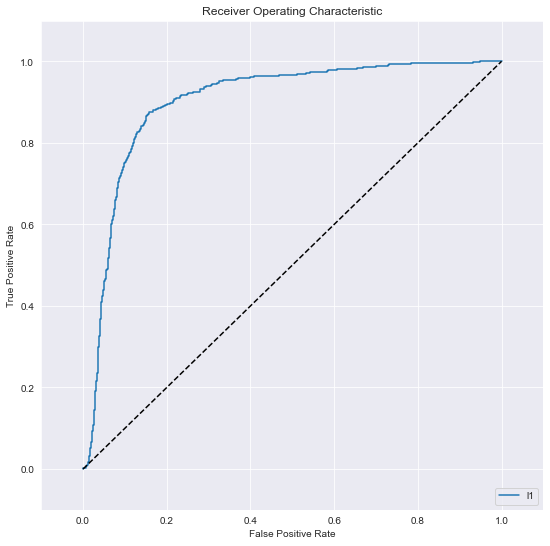

<IPython.core.display.Javascript object>

In [14]:
# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [15]:
# Calculate AUROC
print(roc_auc_score(y_test, pred))

0.9015388373737675


<IPython.core.display.Javascript object>

#### Pick the Winner

In [16]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]

    print(name, roc_auc_score(y_test, pred))

l1 0.9015388373737675
l2 0.9015409194159456
rf 0.9915194952019338
gb 0.988678201643009


<IPython.core.display.Javascript object>

In [17]:
# Save winning model as final_model.pkl
with open("final_model.pkl", "wb") as f:
    pickle.dump(fitted_models["rf"].best_estimator_, f)

<IPython.core.display.Javascript object>